In [4]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
import ast
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('gpu_parts.csv')

In [ ]:
sns.set_style('whitegrid')

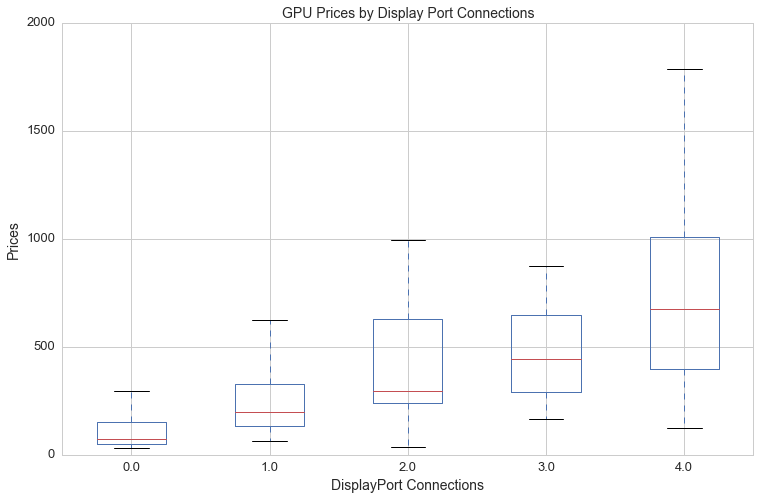

In [48]:
df['DisplayPort_count'] = df['DisplayPort'].fillna(0)
df[(df.avg>0)].boxplot(column='avg', by='DisplayPort_count', figsize=(12,8))
plt.ylim(0,2000)
plt.suptitle('')
plt.title('GPU Prices by Display Port Connections', fontsize=14)
plt.xlabel('DisplayPort Connections', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/prices_by_display.png'))

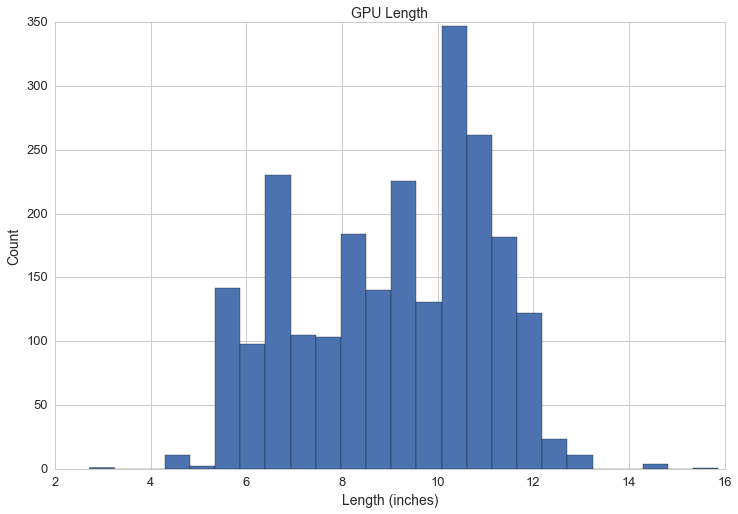

In [70]:
plt.figure(figsize=(12,8))
df[df.gpu_length>0].gpu_length.hist(bins=25)
plt.title('GPU Length', fontsize=14)
plt.xlabel('Length (inches)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/length_hist.png'))

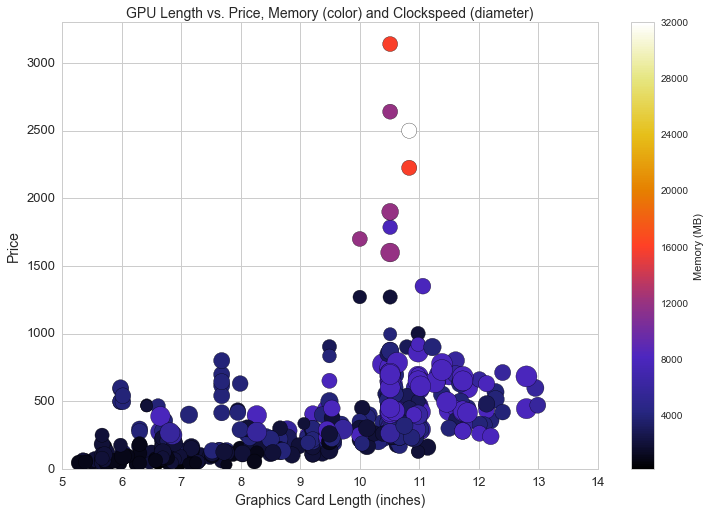

In [50]:
plt.figure(figsize=(12,8))
df_len = df[(df.avg>0)&(df.gpu_length>0)]
plt.scatter(df_len.gpu_length, df_len.avg, c=df_len.memory_mb, cmap='CMRmap', s=df_len.clock_speed_in_mhz/4)
plt.colorbar(label='Memory (MB)')
plt.axis([5,14,0,3300])
plt.title('GPU Length vs. Price, Memory (color) and Clockspeed (diameter)', fontsize=14)
plt.xlabel('Graphics Card Length (inches)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/length_vs_price.png'))

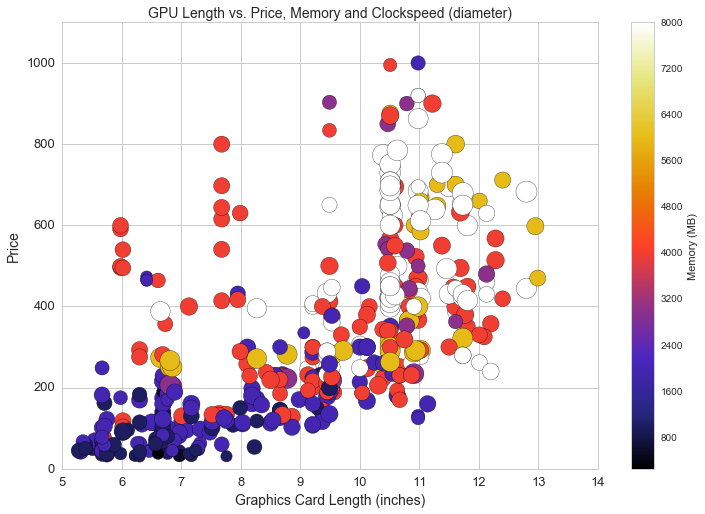

In [53]:
plt.figure(figsize=(12,8))
df_len = df[(df.avg>0)&(df.gpu_length>0)&(df.memory_mb<12000)]
plt.scatter(df_len.gpu_length, df_len.avg, c=df_len.memory_mb, cmap='CMRmap', s=df_len.clock_speed_in_mhz/4)
plt.colorbar(label='Memory (MB)')
plt.axis([5,14,0,1100])
plt.title('GPU Length vs. Price, Memory and Clockspeed (diameter)', fontsize=14)
plt.xlabel('Graphics Card Length (inches)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/length_vs_price_2.png'))

In [ ]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

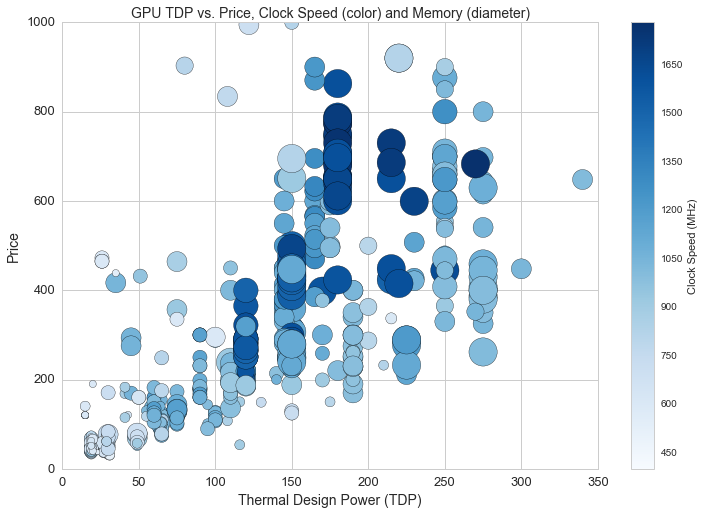

In [69]:
df1 = df[(df.avg>0)&(df.clock_speed_in_mhz>0)]
plt.figure(figsize=(12,8))
plt.scatter(df1.tdp, df1.avg, c=df1.clock_speed_in_mhz, s=df1.memory_mb/10, cmap='Blues')
plt.colorbar(label='Clock Speed (MHz)')
plt.axis([0,350,0,1000])
plt.title('GPU TDP vs. Price, Clock Speed (color) and Memory (diameter)', fontsize=14)
plt.xlabel('Thermal Design Power (TDP)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/tdp_vs_price.png'))

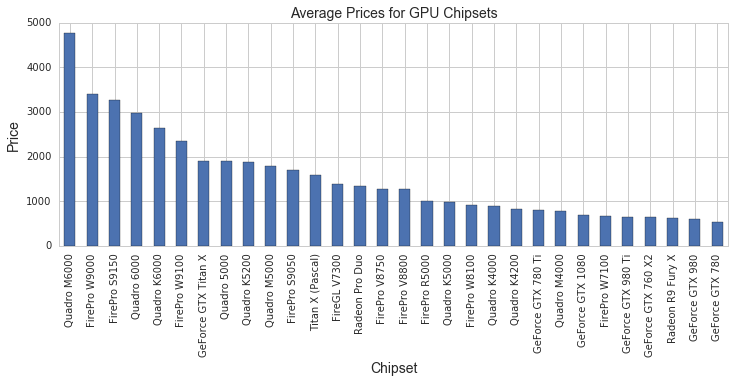

In [117]:
#chipset average price
df1 = df[(df.avg>0)]
plt.figure(figsize=(12,4))
df1.groupby('Chipset').avg.mean().sort_values(ascending=False)[:30].plot(kind='bar')
plt.title('Average Prices for GPU Chipsets', fontsize=14)
plt.xlabel('Chipset', fontsize=14)
plt.ylabel('Price', fontsize=14)

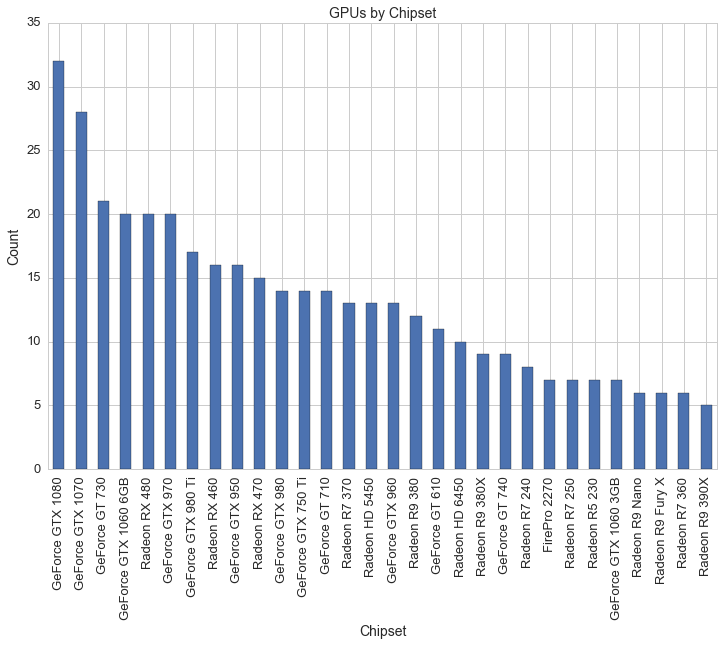

In [71]:
df1 = df[(df.avg>0)]
plt.figure(figsize=(12,8))
df1.groupby('Chipset').avg.count().sort_values( ascending=False)[:30].plot(kind='bar')
plt.title('GPUs by Chipset', fontsize=14)
plt.xlabel('Chipset', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/gpu_chipsets.png'))

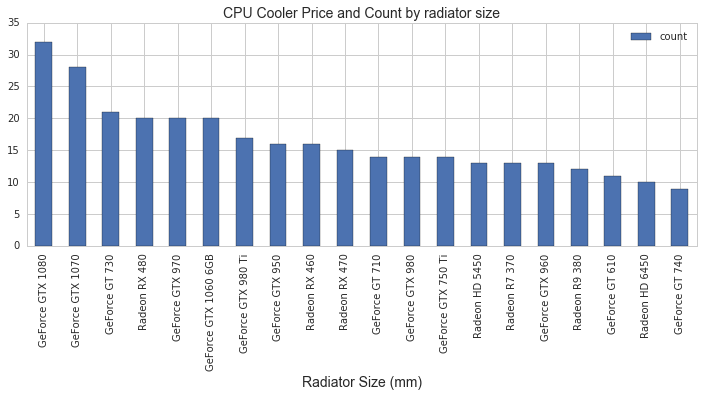

In [312]:
df[df.avg>0].groupby('Chipset').avg.agg(['count']).sort_values('count', ascending=False)[:20].plot(kind='bar', figsize=(12,4))
plt.title('GPUs by Chipset', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('Chipset', fontsize=14)

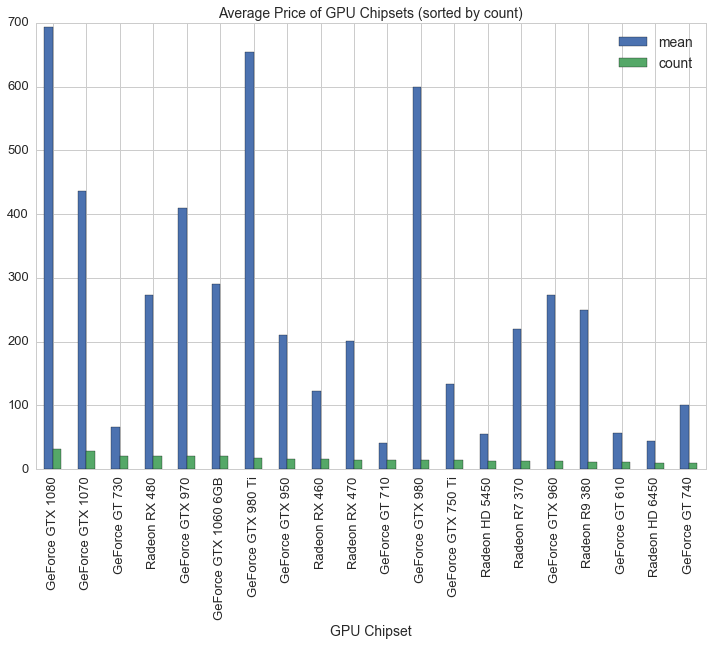

In [73]:
df[df.avg>0].groupby('Chipset').avg.agg(['mean', 'count']).sort_values('count', ascending=False)[:20].plot(kind='bar', figsize=(12,8))
plt.title('Average Price of GPU Chipsets (sorted by count)', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('GPU Chipset', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/gpu_chipsets_by_price.png'))

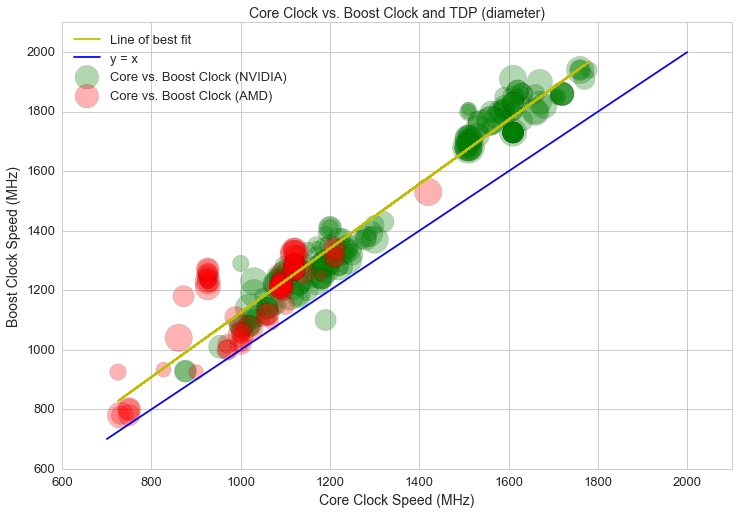

In [76]:
df2 = df[(df.avg>0)&(df.clock_speed_in_mhz>0)&(df.boost_clock_speed_mhz>0)&(df.tdp>0)]

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

x = df2.clock_speed_in_mhz
Y = df2.boost_clock_speed_mhz

x = x.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

lreg.fit(x, Y, sample_weight=None)
s = df2.tdp*3
a = 0.3
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(x,lreg.predict(x), c='y')
plt.scatter(df2[df.make=='NVIDIA'].clock_speed_in_mhz, df2[df.make=='NVIDIA'].boost_clock_speed_mhz, s=s, c='green', alpha=a)
plt.scatter(df2[df.make=='AMD'].clock_speed_in_mhz, df2[df.make=='AMD'].boost_clock_speed_mhz, s=s, c='r', alpha=a)
plt.title('Core Clock vs. Boost Clock and TDP (diameter)', fontsize=14)
plt.xlabel('Core Clock Speed (MHz)', fontsize=14)
plt.ylabel('Boost Clock Speed (MHz)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axis([600,2100,600,2100])
x_points = [700,1000,1500,2000]
y_points = [700,1000,1500,2000]

plt.plot(x_points,y_points, c='blue')
plt.legend([ 'Line of best fit', 'y = x', 'Core vs. Boost Clock (NVIDIA)', 'Core vs. Boost Clock (AMD)'], loc='upper left', fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/gpu_clock_vs_boost.png'))

In [ ]:
df2 = df[(df.avg>0)&(df.clock_speed_in_mhz>0)&(df.boost_clock_speed_mhz>0)]

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

x = df2.clock_speed_in_mhz
Y = df2.boost_clock_speed_mhz

x = x.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

lreg.fit(x, Y, sample_weight=None)
#s = 
sns.set_style('whitegrid')
plt.figure(figsize=(12,12))
plt.plot(x,lreg.predict(x), c='y')
plt.scatter(df2[df.make=='NVIDIA'].clock_speed_in_mhz, df2[df.make=='NVIDIA'].boost_clock_speed_mhz, s=50, c='green')
plt.scatter(df2[df.make=='AMD'].clock_speed_in_mhz, df2[df.make=='AMD'].boost_clock_speed_mhz, s=50, c='r')
plt.title('Core Clock vs. Boost Clock')
plt.xlabel('Core Clock Speed (MHz)', fontsize=14)
plt.ylabel('Boost Clock Speed (MHz)', fontsize=14)
plt.axis([600,2100,600,2100])
x_points = [700,1000,1500,2000]
y_points = [700,1000,1500,2000]

plt.plot(x_points,y_points, c='blue')
plt.legend([ 'Line of best fit', 'y = x', 'Core vs. Boost Clock (NVIDIA)', 'Core vs. Boost Clock (AMD)'], loc='upper left', fontsize=12)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/gpu_clock_vs_boost.png'))

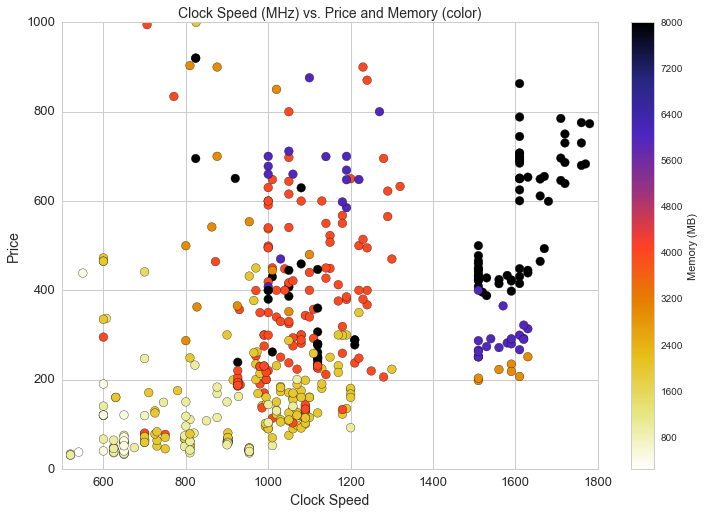

In [77]:
df2 = df[(df.avg>0)&(df.clock_speed_in_mhz>0)&(df.memory_mb<10000)]
plt.figure(figsize=(12,8))
plt.scatter(df2.clock_speed_in_mhz, df2.avg, s=75, c=df2.memory_mb, cmap='CMRmap_r')
plt.colorbar(label='Memory (MB)')
plt.axis([500,1800,0,1000])
plt.title('Clock Speed (MHz) vs. Price and Memory (color)', fontsize=14)
plt.xlabel('Clock Speed', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/clock_speed_vs_price_and_memory.png'))

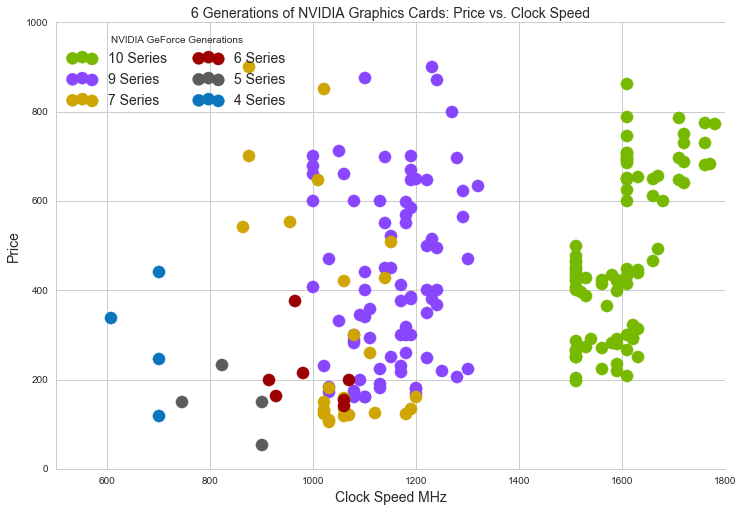

In [88]:
#6 generations of NVIDIA graphics cards
df_N = df[(df.make=="NVIDIA")&(df.avg>0)]
df_N['NVIDIA_Series'] = [10 if 'GTX 10' in x else \
                          9 if 'GTX 9' in x else \
                          7 if 'GTX 7' in x else \
                          6 if 'GTX 6' in x else \
                          5 if 'GTX 5' in x else \
                          4 if 'GTX 4' in x else \
                          'other' for x in df_N.Chipset]

plt.figure(figsize=(12,8))
plt.axis([500,1800,0,1000])
plt.title('6 Generations of NVIDIA Graphics Cards: Price vs. Clock Speed', fontsize=14)
plt.xlabel('Clock Speed MHz', fontsize=14)
plt.ylabel('Price', fontsize=14)

colors = ['#76b900', '#8946ff', '#cea503', '#9c0000', '#5c5c5c', '#0b75bd']
s = 150
n10 = plt.scatter(df_N[df_N.NVIDIA_Series==10].clock_speed_in_mhz, df_N[df_N.NVIDIA_Series==10].avg, color = colors[0], s=s)
n9 = plt.scatter(df_N[df_N.NVIDIA_Series==9].clock_speed_in_mhz, df_N[df_N.NVIDIA_Series==9].avg, color = colors[1], s=s)
n7 = plt.scatter(df_N[df_N.NVIDIA_Series==7].clock_speed_in_mhz, df_N[df_N.NVIDIA_Series==7].avg, color = colors[2], s=s)
n6 = plt.scatter(df_N[df_N.NVIDIA_Series==6].clock_speed_in_mhz, df_N[df_N.NVIDIA_Series==6].avg, color = colors[3], s=s)
n5 = plt.scatter(df_N[df_N.NVIDIA_Series==5].clock_speed_in_mhz, df_N[df_N.NVIDIA_Series==5].avg, color = colors[4], s=s)
n4 = plt.scatter(df_N[df_N.NVIDIA_Series==4].clock_speed_in_mhz, df_N[df_N.NVIDIA_Series==4].avg, color = colors[5], s=s)

plt.legend((n10, n9, n7, n6, n5, n4),
           ('10 Series', '9 Series', '7 Series', '6 Series', '5 Series', '4 Series'),
           title = 'NVIDIA GeForce Generations',
           scatterpoints=3,
           loc='upper left',
           ncol=2,
           fontsize=14) 
sns.despine()
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/six_NVIDIA.png'))

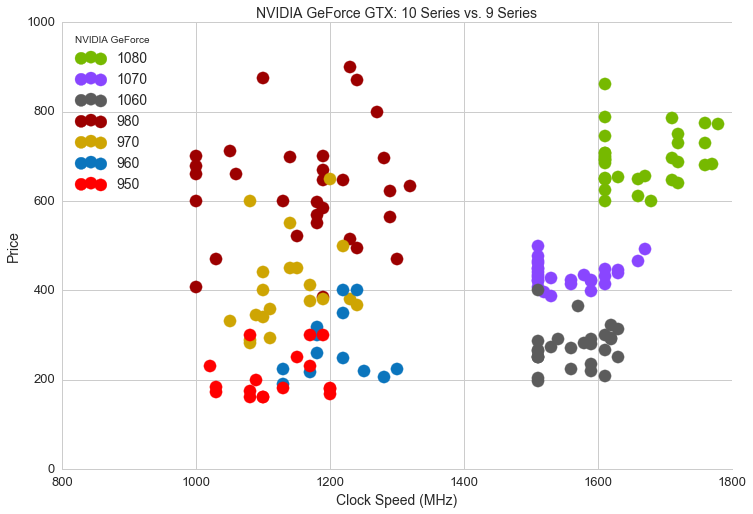

In [89]:
#10 Series vs. 9 Series
df_N = df[(df.make=="NVIDIA")&(df.avg>0)]
df_N['NVIDIA_Series_9_10'] = [1080 if 'GTX 108' in x else \
                          1070 if 'GTX 1070' in x else \
                          1060 if 'GTX 1060' in x else \
                          980 if 'GTX 980' in x else \
                          970 if 'GTX 970' in x else \
                          960 if 'GTX 960' in x else \
                          950 if 'GTX 950' in x else \
                          'other' for x in df_N.Chipset]

plt.figure(figsize=(12,8))
plt.axis([800,1800,0,1000])
plt.title('NVIDIA GeForce GTX: 10 Series vs. 9 Series', fontsize=14)
plt.xlabel('Clock Speed (MHz)', fontsize=14)
plt.ylabel('Price', fontsize=14)

colors = ['#76b900', '#8946ff', '#5c5c5c', '#9c0000', '#cea503', '#0b75bd', 'red']
s = 150

n1080 = df_N[df_N.NVIDIA_Series_9_10==1080]
n1070 = df_N[df_N.NVIDIA_Series_9_10==1070]
n1060 = df_N[df_N.NVIDIA_Series_9_10==1060]
n980 = df_N[df_N.NVIDIA_Series_9_10==980]
n970 = df_N[df_N.NVIDIA_Series_9_10==970]
n960 = df_N[df_N.NVIDIA_Series_9_10==960]
n950 = df_N[df_N.NVIDIA_Series_9_10==950]

n_1080 = plt.scatter(n1080.clock_speed_in_mhz, n1080.avg, color = colors[0], s=s)
n_1070 = plt.scatter(n1070.clock_speed_in_mhz, n1070.avg, color = colors[1], s=s)
n_1060 = plt.scatter(n1060.clock_speed_in_mhz, n1060.avg, color = colors[2], s=s)
n_980 = plt.scatter(n980.clock_speed_in_mhz, n980.avg, color = colors[3], s=s)
n_970 = plt.scatter(n970.clock_speed_in_mhz, n970.avg, color = colors[4], s=s)
n_960 = plt.scatter(n960.clock_speed_in_mhz, n960.avg, color = colors[5], s=s)
n_950 = plt.scatter(n950.clock_speed_in_mhz, n950.avg, color = colors[6], s=s)

plt.legend((n_1080, n_1070, n_1060, n_980, n_970, n_960, n_950),
           ('1080', '1070', '1060', '980', '970', '960', '950'),
           title = 'NVIDIA GeForce',
           scatterpoints=3,
           loc='upper left',
           ncol=1,
           fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/gpu/9_vs_10.png'))